In [534]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset,load_traffic_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap, imd_1d_smap
import importlib
importlib.reload(imd_nd_smap)
importlib.reload(imd_1d_smap)

<module 'manifold_learning.imd_1d_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_1d_smap.py'>

In [563]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=4, subtract_corr=True, device="cpu")


In [564]:
W = trainer.find_iterative_solution(observables, sample_len=200, library_len=1500, 
            exclusion_rad=90, theta=5, tp=90, 
            epochs=50, num_batches=32, tp_policy="fixed")


tensor(6.3909)
tensor(5.7379)
tensor(5.0360)
tensor(4.8269)
tensor(3.8285)
tensor(3.3375)
tensor(3.2430)
tensor(3.9322)
tensor(3.8245)
tensor(3.8971)
tensor(3.7652)
tensor(3.8295)
tensor(3.7201)
tensor(3.8376)
tensor(3.6690)
tensor(4.1674)
tensor(3.3993)
tensor(3.6169)
tensor(3.4585)
tensor(3.9741)
tensor(3.5696)
tensor(3.6331)
tensor(3.6916)
tensor(3.4028)
tensor(3.6256)
tensor(3.4065)
tensor(3.5448)
tensor(3.8473)
tensor(3.8616)
tensor(3.4615)
tensor(3.7038)
tensor(3.7998)
tensor(3.5956)
tensor(3.8717)
tensor(4.1014)
tensor(3.9991)
tensor(3.6020)
tensor(3.3634)
tensor(3.6161)
tensor(4.1720)
tensor(3.7351)
tensor(3.7165)
tensor(3.2948)
tensor(3.6300)
tensor(3.7579)
tensor(3.7425)
tensor(3.5302)
tensor(3.6054)
tensor(3.6014)
tensor(3.8164)


In [565]:
unmixed = observables @ W

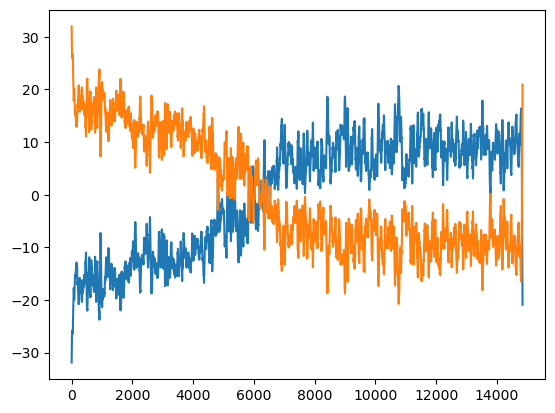

In [566]:
plt.plot(unmixed[:,:])

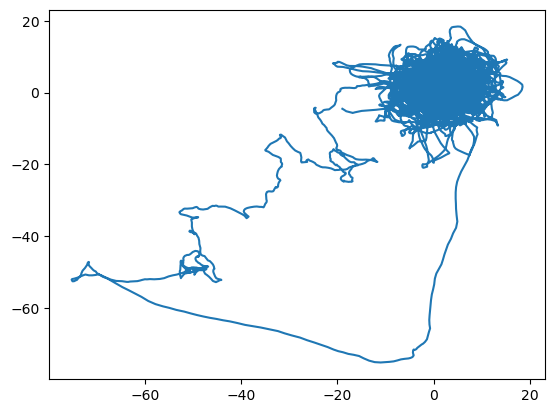

In [553]:
plt.plot(unmixed[:-70,0],unmixed[70:,0])

In [555]:
CCM.PairwiseCCM().compute(unmixed[None],unmixed[None],1500,400,60,30,method="smap",theta=5,)


array([[[0.85539216]],

       [[0.8549064 ]]], dtype=float32)

In [3]:
# Load traffic dataset
X = load_traffic_dataset()
page_names = X["Page"].to_numpy().astype("str")
X = X[X.columns[1:]]

df = X.T

# Interpolate missing values
df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Fill any remaining missing values with zeros
df_filled = df_interpolated.fillna(0)
X = df_filled.to_numpy().astype(np.float32)


X = np.log(X+1)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
page_names = page_names[X.mean(axis=0) != 0]
X = X[:,X.mean(axis=0) != 0]
X = (X-X.mean(axis=0))/X.std(axis=0)

mask = (np.count_nonzero(np.diff(X[:,:],axis=0),axis=0) > 750)
X = X[:,mask]
page_names = page_names[mask]
observables = StandardScaler().fit_transform(X)

In [32]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [497]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

observables = StandardScaler().fit_transform(X)

In [533]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
#X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [304]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [515]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(1)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [6]:
observables = np.concatenate([observables, np.random.normal(0,1,(observables.shape[0],30))],axis=1)

In [7]:
observables = observables @ np.random.normal(0,1,(observables.shape[1],300))

In [141]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=4, subtract_corr=True, device="cpu")


In [136]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], embed_dim=5, embed_lag=20, n_components=4, subtract_corr=True, device="cuda")



In [106]:
trainer.fit(observables, sample_len=100, library_len=800, 
            exclusion_rad=90, theta=5, tp=70, 
            epochs=1000, num_batches=32, optimizer="Adam", learning_rate=0.03, tp_policy="range")


Epoch 1/1000, Loss: 1.1478
Epoch 2/1000, Loss: 1.3910
Epoch 3/1000, Loss: 1.3529
Epoch 4/1000, Loss: 1.2088
Epoch 5/1000, Loss: 1.1239
Epoch 6/1000, Loss: 1.1441
Epoch 7/1000, Loss: 1.1398
Epoch 8/1000, Loss: 1.1269
Epoch 9/1000, Loss: 1.1258
Epoch 10/1000, Loss: 1.1216
Epoch 11/1000, Loss: 1.1195
Epoch 12/1000, Loss: 1.0926
Epoch 13/1000, Loss: 1.0824
Epoch 14/1000, Loss: 1.0728
Epoch 15/1000, Loss: 1.0603
Epoch 16/1000, Loss: 1.0602
Epoch 17/1000, Loss: 1.0389
Epoch 18/1000, Loss: 1.0220
Epoch 19/1000, Loss: 1.0136
Epoch 20/1000, Loss: 1.0152
Epoch 21/1000, Loss: 1.0171
Epoch 22/1000, Loss: 1.0206
Epoch 23/1000, Loss: 0.9994
Epoch 24/1000, Loss: 0.9943
Epoch 25/1000, Loss: 0.9976
Epoch 26/1000, Loss: 0.9914
Epoch 27/1000, Loss: 0.9794
Epoch 28/1000, Loss: 0.9872
Epoch 29/1000, Loss: 0.9813
Epoch 30/1000, Loss: 0.9795
Epoch 31/1000, Loss: 0.9817
Epoch 32/1000, Loss: 0.9773
Epoch 33/1000, Loss: 0.9957
Epoch 34/1000, Loss: 0.9788
Epoch 35/1000, Loss: 0.9750
Epoch 36/1000, Loss: 0.9729
E

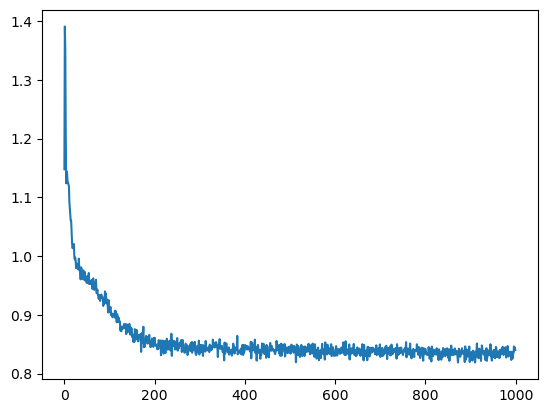

In [107]:
plt.plot(trainer.get_loss_history()[:])


In [108]:

unmixed = trainer.predict(observables)

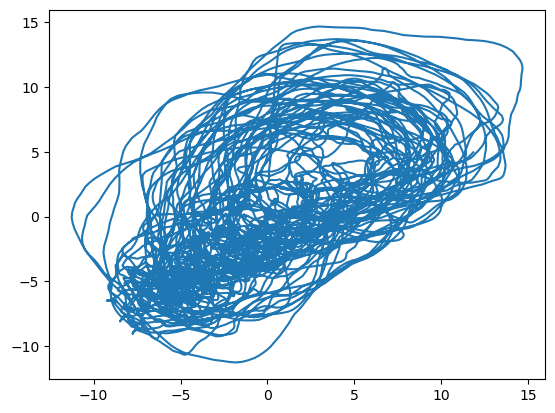

In [109]:
plt.plot(unmixed[30:,0,0],unmixed[:-30,0,0])

In [110]:

plt.plot(unmixed[:,5,0])
#plt.xlim(0,2000)

IndexError: index 5 is out of bounds for axis 1 with size 4

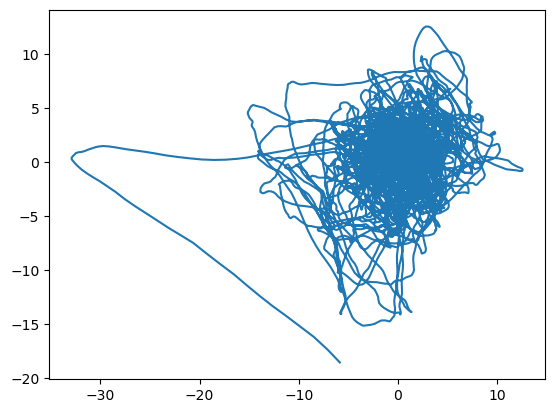

In [111]:
plt.plot(unmixed[:-50,3,0], unmixed[50:,3,0])

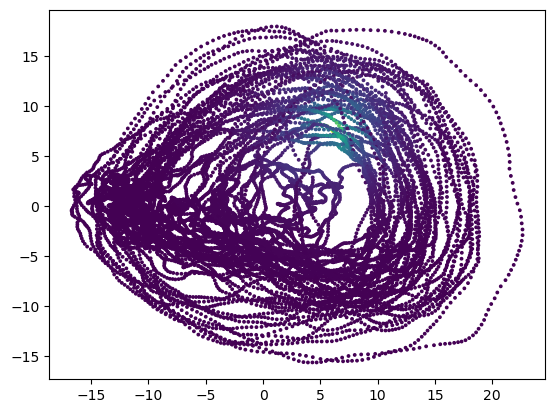

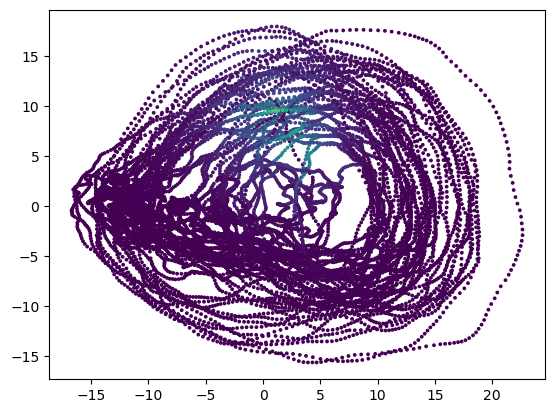

In [112]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,0][[210]],unmixed[:,0])[0]
weights = np.exp(-(5*dist/dist.mean()))

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[:-20,0],x_pca[:-20,1],c=weights[:-20],s=3)
plt.show()

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[20:,0],x_pca[20:,1],c=weights[:-20],s=3)

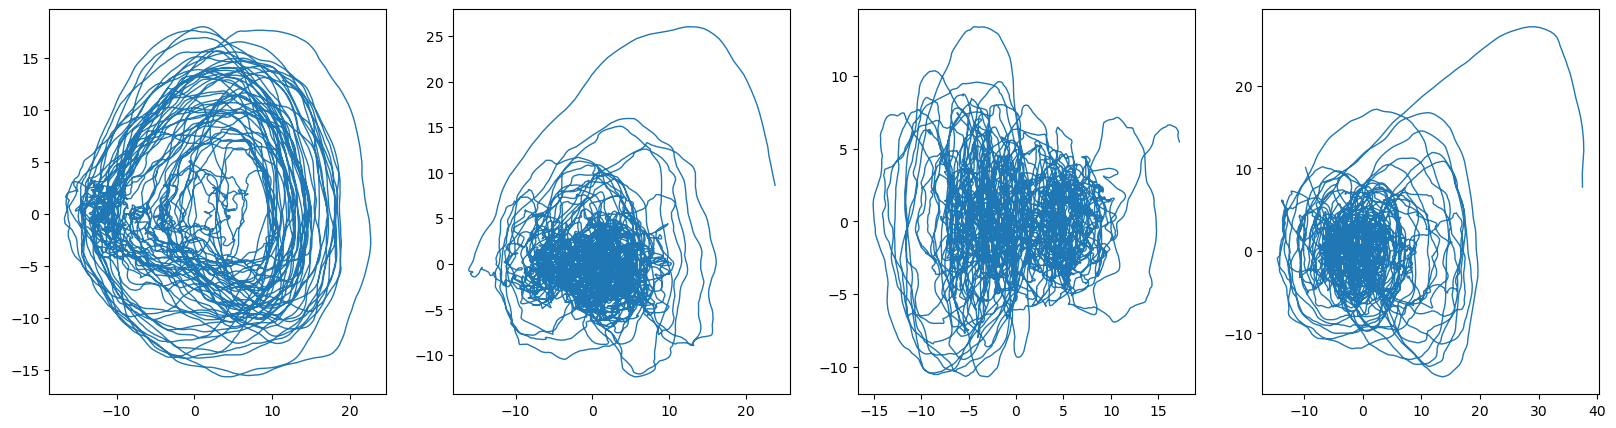

In [113]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

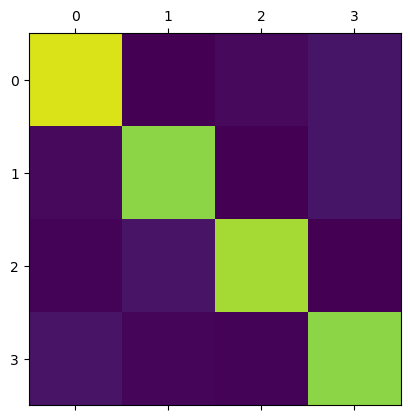

In [128]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,50,method="smap",theta=5,).mean(axis=0),vmin=0,vmax=1)

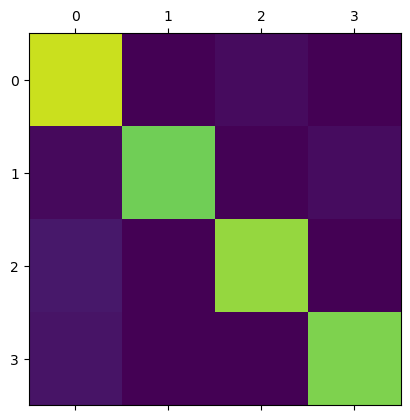

In [115]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,50,method="simplex",nbrs_num=15,).mean(axis=0),vmin=0,vmax=1)

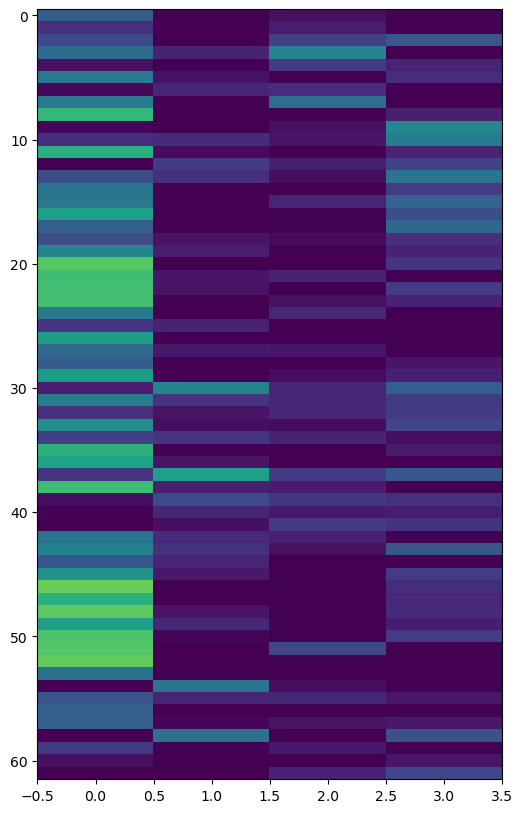

In [125]:
plt.figure(figsize=(6,10))
unmixed_xmap_X = CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),observables.T[:,:,None],15000,300,60,0,method="simplex",nbrs_num=15,).mean(axis=0)
plt.imshow(unmixed_xmap_X,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

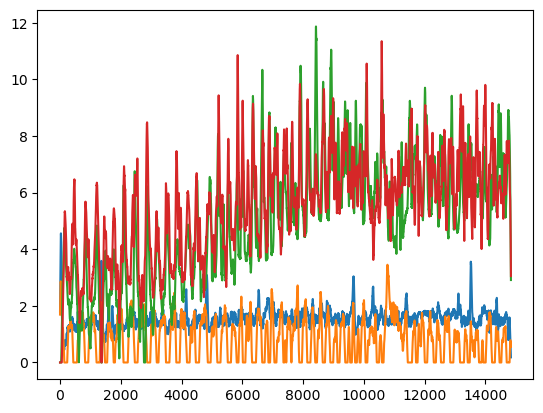

In [132]:

plt.plot(X[:,37])
plt.plot(X[:,46])
plt.plot(X[:,3])
plt.plot(X[:,7])

In [129]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,1,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [130]:
fig = px.line_3d(x=unmixed[:,0,0], y=unmixed[:,0,1],z=unmixed[:,0,2],height=700)

fig.show()

In [509]:
vars = []
for j in range(10):
    trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=3, subtract_corr=True, device="cuda")
    trainer.fit(observables, sample_len=80, library_len=800, 
            exclusion_rad=90, theta=4, tp=90, 
            epochs=300, num_batches=32, optimizer="Adagrad", learning_rate=0.02, tp_policy="range")

    unmixed = trainer.predict(observables)
    vars += [np.transpose(unmixed,(1,0,2))]
vars = np.concatenate(vars)
plt.matshow(CCM.PairwiseCCM().compute(vars,vars,1500,400,60,30,90,False).mean(axis=0),vmin=0,vmax=1)

Epoch 1/300, Loss: 1.2159
Epoch 2/300, Loss: 1.4649
Epoch 3/300, Loss: 1.3613
Epoch 4/300, Loss: 1.3013
Epoch 5/300, Loss: 1.2649
Epoch 6/300, Loss: 1.1351
Epoch 7/300, Loss: 1.1806
Epoch 8/300, Loss: 1.0274
Epoch 9/300, Loss: 1.0938
Epoch 10/300, Loss: 0.9522
Epoch 11/300, Loss: 0.9704
Epoch 12/300, Loss: 0.9978
Epoch 13/300, Loss: 0.9149
Epoch 14/300, Loss: 0.9327
Epoch 15/300, Loss: 0.8954
Epoch 16/300, Loss: 0.9002


KeyboardInterrupt: 

13.0